# Exploratory Data Analysis (EDA) 

## Sample Superstore Dataset
Pada notebook berisikan pembahasan terkait EDA dengan menggunakan Sample Superstore Dataset yang dapat di *download* di link berikut: https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls  

Sample superstore dataset merupakan sebuah data yang berasal dari data transaksi sebuah perusahaan retail. Jadi pada notebook ini akan menggali lebih dalam untuk mendapatkan keputusan yang baik untuk perusahaan dalam meningkatkan keuntungan.

### Features

Description:
* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

## Preparing The Tools

In [1]:
# Import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline 

# Import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

## Load Data

In [132]:
# import dataset
# orders = pd.read_csv('Superstore_Orders.csv')
returns = pd.read_csv('Superstore_Returns.csv')
people = pd.read_csv('Superstore_People.csv')

## Data Exploration (exploratory data analysis or EDA)

Setelah melakukan import semua library yang telah dibutuhkan, langkah selanjutnya adalah untuk melakukan eksplorasi terhadap isi data. Berikut adalah beberapa pertanyaan yang biasa dilakukan ketika melakukan ekplorasi data.  
1. Apa permasalahan yang ingin diselesaikan?  
2. Apa tipe data yang dimiliki dan bagaimana cara memperlakukan tipe data yang berbeda?  
3. Apakah terdapat data yang hilang, dan bagaimana cara memperlakukan data tersebut?  
4. Apakah terdapat outlier dan bagaimana cara memperlakukan data tersebut?  
5. Bagaimana cara mendapatkan insight dari data tersebut?  

## Check the Data

In [3]:
# Mengecek 5 data pertama orders
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Mengecek 5 data pertama orders
returns.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [5]:
# Mengecek 5 data pertama people
people.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


Dari ketiga data diatas terlihat bahwa, data **orders merupakan data yang paling sering kita gunakan kedepannya karena pada data tersebut berisikan inti features**, sedangkan data returns merupakan data yang hanya berisikan transaksi yang pernah melakukan pengembalian barang sedangkan untuk data people berisikan data Person in Charge (PIC) di masing-masing region. kedua **data returns dan people akan digunakan sebagai data pendukung** dalam melakukan *Exploratory Data Analysis*.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

`df.info()` digunakan untuk mendapatkan quick insight dari keseluruhan data seperti tipe data pada masing masing kolom dan juga jumlah data yang tidak terhitung sebagai null

Tipe data Date di dataset berupa object dan perlu diubah menjadi tipe data waktu agar memudahkan pada preprocessing data dengan melakukan import ulang dataset seperti berikut.

In [7]:
# Import data namun dengan mengatur kedua kolom tanggal menjadi tipe data yang sesuai
orders = pd.read_csv('Superstore_Orders.csv', parse_dates=['Order Date', 'Ship Date'])

**Check Missing Value**

In [8]:
orders.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Check Duplicate Data**

In [9]:
orders.duplicated().sum()

0

**Statistic Summary**

In [10]:
orders.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Dalam notebook ini, yang menjadi kunci analisa dalam menentukan solusi untuk meningkatkan keuntungan pada perusahaan adalah pada ke 4 kolom diatas yaitu `Sales`, `Quantity`, `Discount` dan `Profit`.

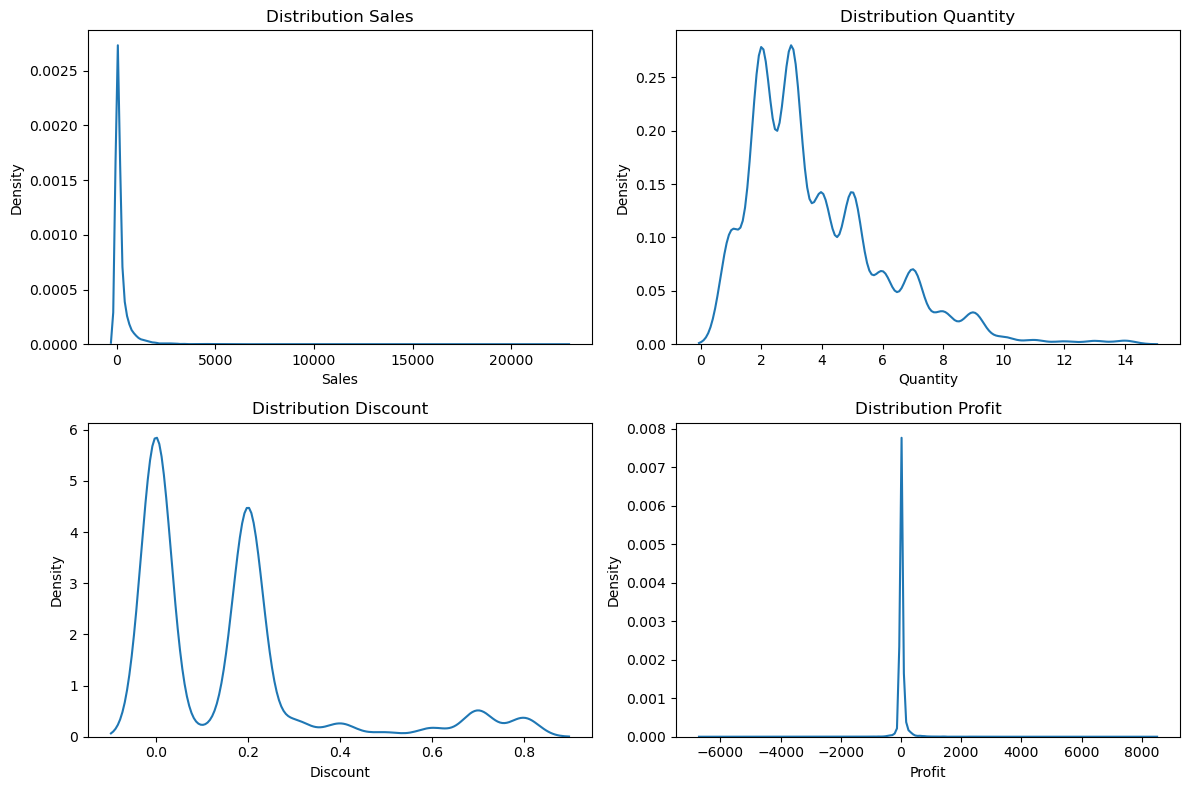

In [11]:
figure,axis=plt.subplots(2,2,figsize=(12,8))

sns.kdeplot(data=orders, x='Sales', ax=axis[0,0]).set_title('Distribution Sales')
sns.kdeplot(data=orders, x='Quantity', ax=axis[0,1]).set_title('Distribution Quantity')
sns.kdeplot(data=orders, x='Discount', ax=axis[1,0]).set_title('Distribution Discount')
sns.kdeplot(data=orders, x='Profit', ax=axis[1,1]).set_title('Distribution Profit')
plt.title('')
plt.tight_layout()
plt.show()

- Grafik Histogram diatas digunakan untuk mengetahui bagaimana penyebaran data dalam suatu kolom. Dari ke-4 data tersebut terlihat bahwa seluruh data tidak tersebar secara normal. **Tidak Terdistribusi Normal**

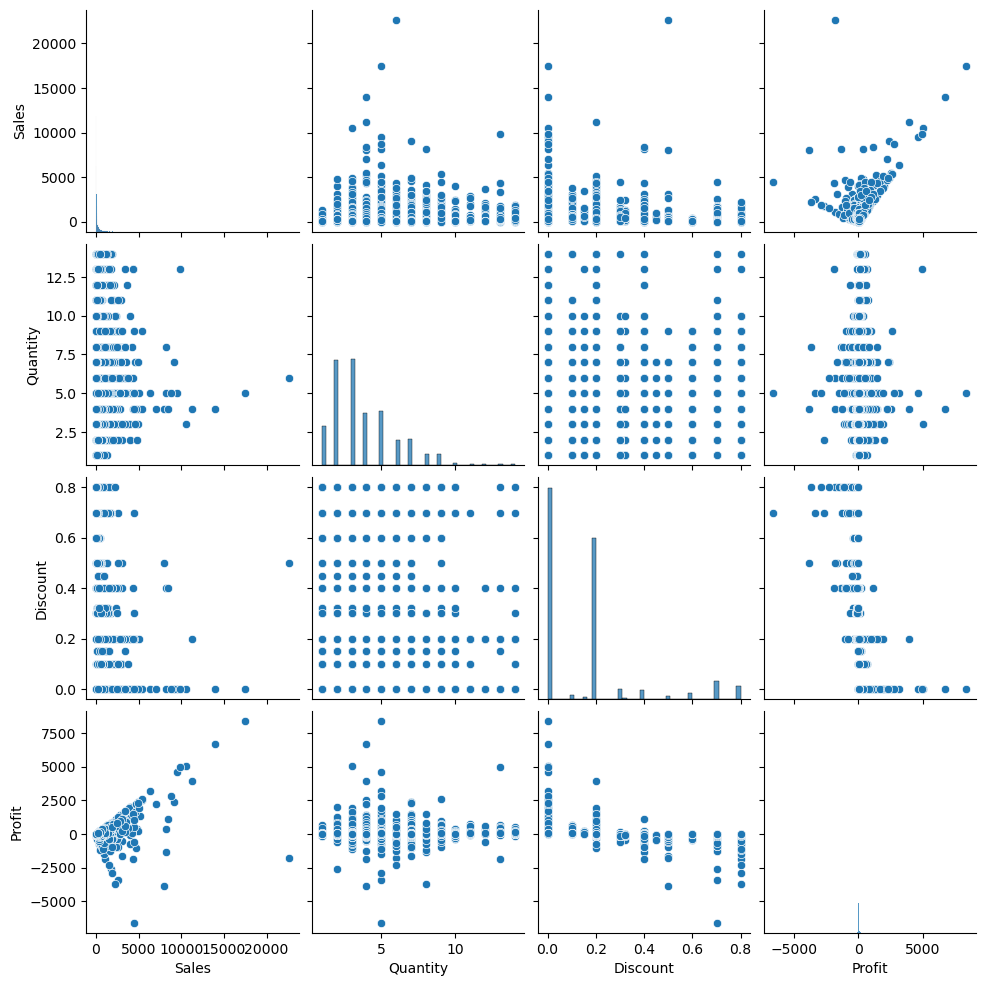

In [12]:
sns.pairplot(data=orders[['Sales', 'Quantity', 'Discount', 'Profit']])

- Grafik diatas menunjukkan hubungan antar tiap 4 data kunci tersebut. dan terlihat bahwa beberapa data memiliki hubungan yang linear/monotonik namun dengan kekuatan tidak terlalu signifikan. selanjutnya dapat dilihat dengan menggunakan metode korelasi untuk mengetahui hubungan antar variable numerik.

In [13]:
orders.corr(method='spearman')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.011466,-0.001310,-0.002416,0.012655,-0.010545
Postal Code,0.011466,1.000000,-0.002059,0.013952,0.052793,-0.005451
Sales,-0.001310,-0.002059,1.000000,0.327426,-0.056969,0.518407
Quantity,-0.002416,0.013952,0.327426,1.000000,-0.000878,0.234491
Discount,0.012655,0.052793,-0.056969,-0.000878,1.000000,-0.543350
Profit,-0.010545,-0.005451,0.518407,0.234491,-0.543350,1.000000


Berikut adalah penjelasan dari ke 4 data tersebut:  
`Profit-Sales`, memiliki **korelasi positif** atau berbanding lurus dengan **nilai korelasi 0.51** yang dapat diartikan kekuatan hubungan kedua variable medium.  
`Sales-Quantity`, memiliki **korelasi positif** atau berbanding lurus dengan **nilai korelasi 0.32** yang dapat diartikan kekuatan hubungan kedua variable medium.  
`Profit-Discount`, memiliki **korelasi negatif** atau berbanding terbalik dengan **nilai korelasi -0.54** yang dapat diartikan kekuatan hubungan kedua variable medium.  


In [14]:
# membuat variable baru
orders['Order Year'] = pd.DatetimeIndex(orders['Order Date']).year # membuat variabel baru bernama Order Year
orders['Order Month'] = pd.DatetimeIndex(orders['Order Date']).month # membuat variabel baru bernama Order Month
orders['Profit Margin'] = (orders.Profit / orders.Sales) * 100 # membuat variabel baru bernama Profit Margin

In [15]:
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Profit Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,16.00
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,30.00
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,47.00
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,-40.00
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11.25


### Exploratory

In [16]:
df= orders.copy()
# copy data orders

NameError: name 'ax' is not defined

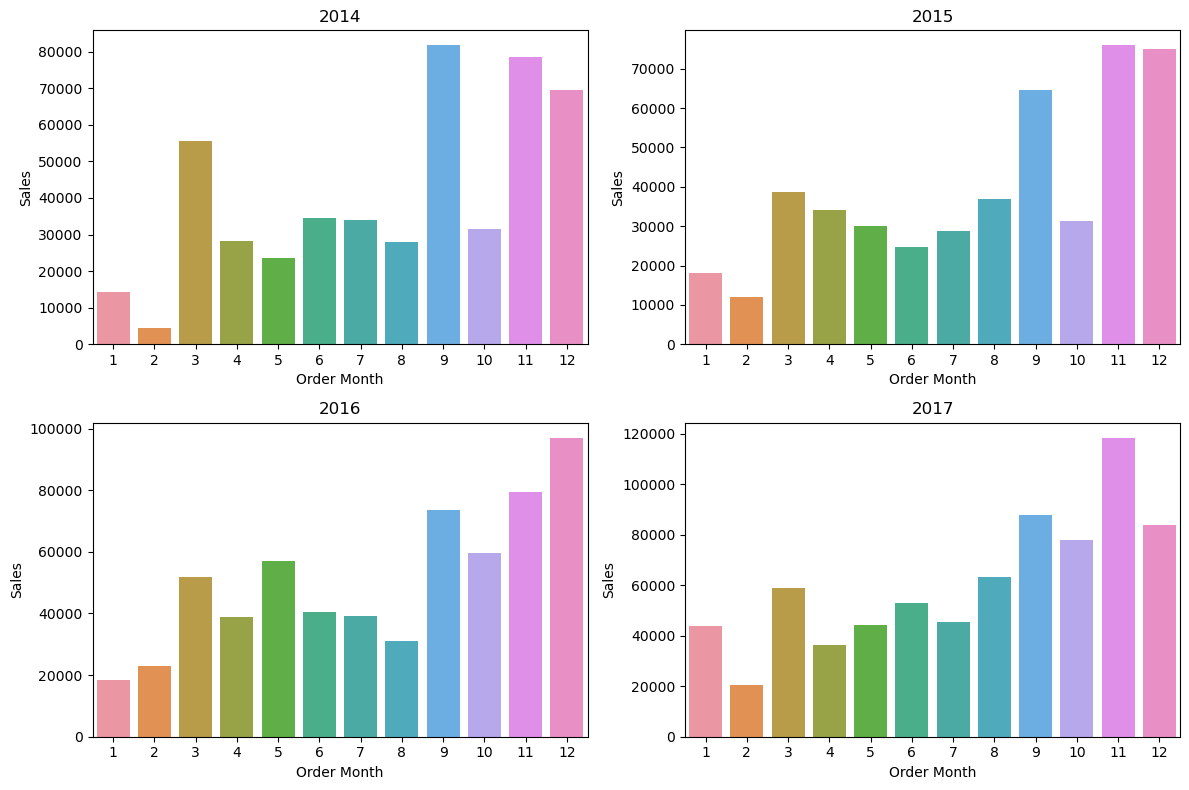

In [17]:
# Menampilkan pattern sales bulanan berdasarkan tahunnya
figure,axis=plt.subplots(2,2,figsize=(12,8))

sales_2014 = df[(df['Order Year']==2014)].groupby('Order Month', as_index=False).sum()
sales_2015 = df[(df['Order Year']==2015)].groupby('Order Month', as_index=False).sum()
sales_2016 = df[(df['Order Year']==2016)].groupby('Order Month', as_index=False).sum()
sales_2017 = df[(df['Order Year']==2017)].groupby('Order Month', as_index=False).sum()

# Plot barplots
sns.barplot(data=sales_2014, x='Order Month', y='Sales', ax=axis[0,0]).set(title='2014')
sns.barplot(data=sales_2015, x='Order Month', y='Sales', ax=axis[0,1]).set(title='2015')
sns.barplot(data=sales_2016, x='Order Month', y='Sales', ax=axis[1,0]).set(title='2016')
sns.barplot(data=sales_2017, x='Order Month', y='Sales', ax=axis[1,1]).set(title='2017')

figure.tight_layout()


plt.show()

NameError: name 'ax' is not defined

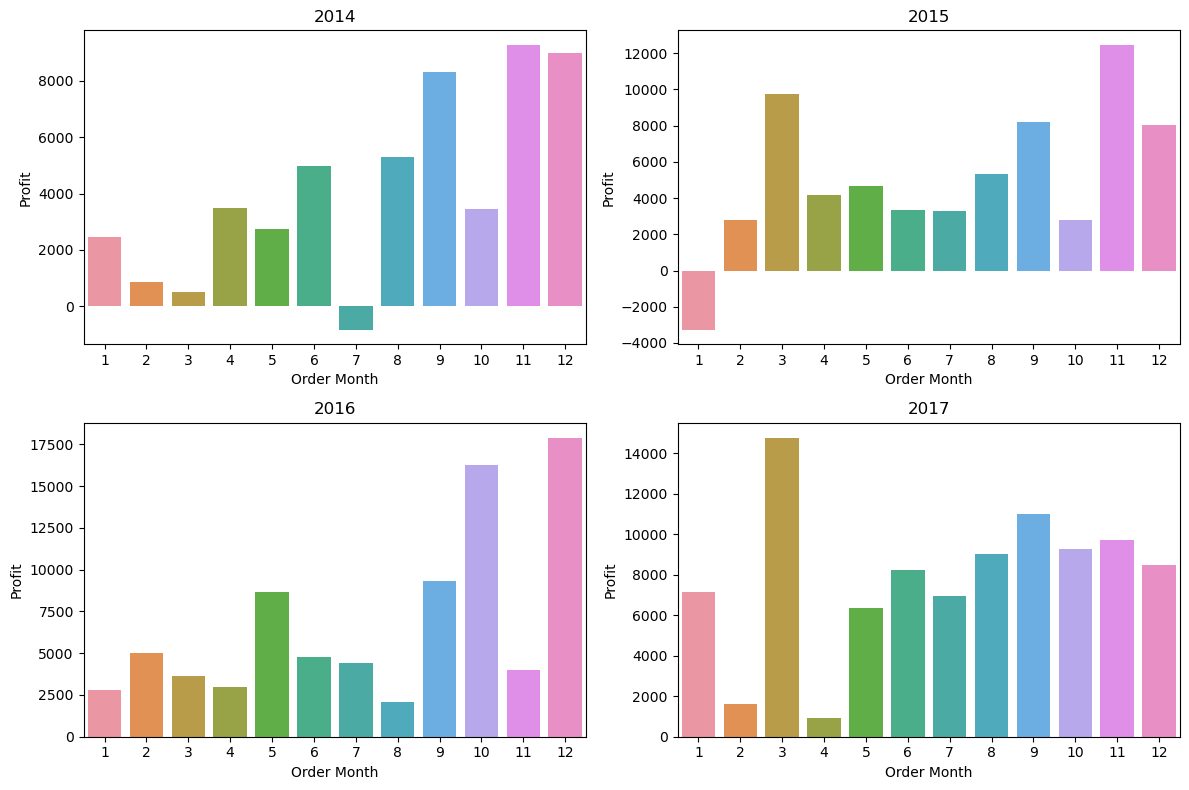

In [18]:
# Menampilkan pattern profit bulanan berdasarkan tahunnya
figure,axis=plt.subplots(2,2,figsize=(12,8))

sales_2014 = df[(df['Order Year']==2014)].groupby('Order Month', as_index=False).sum()
sales_2015 = df[(df['Order Year']==2015)].groupby('Order Month', as_index=False).sum()
sales_2016 = df[(df['Order Year']==2016)].groupby('Order Month', as_index=False).sum()
sales_2017 = df[(df['Order Year']==2017)].groupby('Order Month', as_index=False).sum()

# Plot barplots
sns.barplot(data=sales_2014, x='Order Month', y='Profit', ax=axis[0,0]).set(title='2014')
sns.barplot(data=sales_2015, x='Order Month', y='Profit', ax=axis[0,1]).set(title='2015')
sns.barplot(data=sales_2016, x='Order Month', y='Profit', ax=axis[1,0]).set(title='2016')
sns.barplot(data=sales_2017, x='Order Month', y='Profit', ax=axis[1,1]).set(title='2017')

figure.tight_layout()


plt.show()

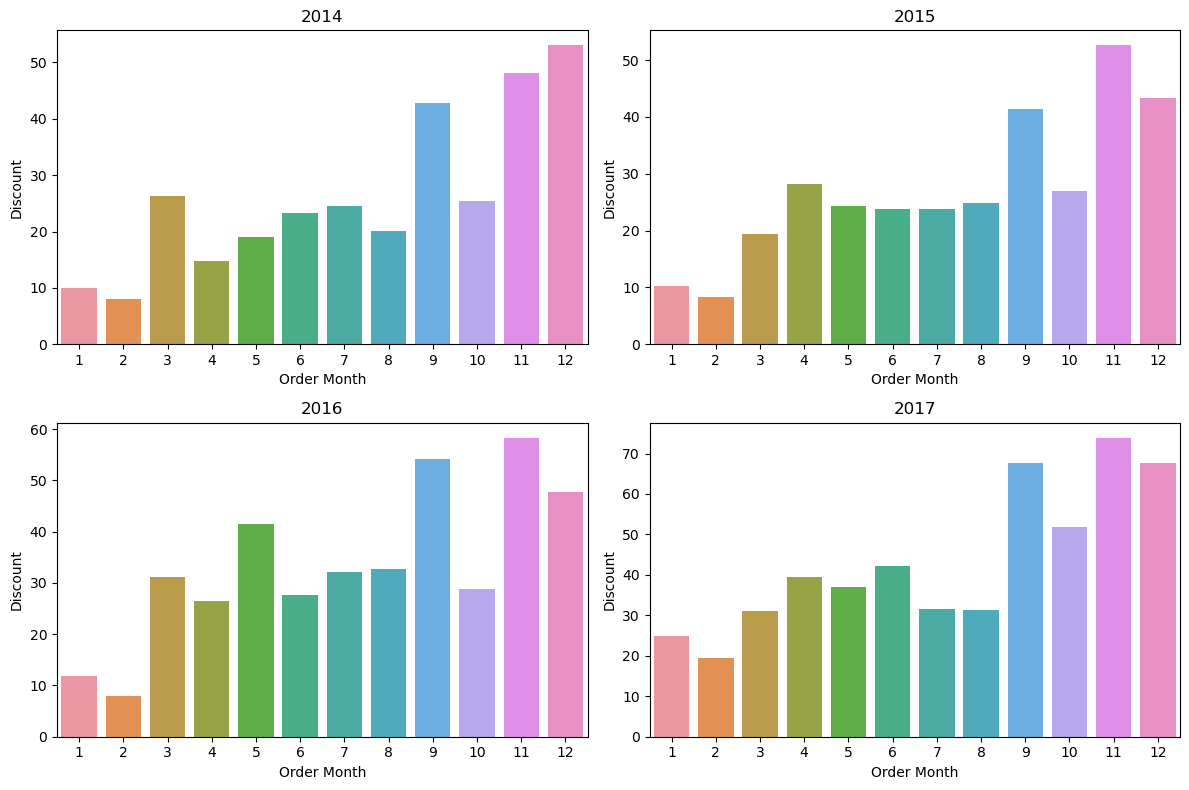

In [45]:
# Menampilkan Density bulanan discount berdasarkan tahun
figure,axis=plt.subplots(2,2,figsize=(12,8))

sales_2014 = df[(df['Order Year']==2014)].groupby('Order Month', as_index=False).sum()
sales_2015 = df[(df['Order Year']==2015)].groupby('Order Month', as_index=False).sum()
sales_2016 = df[(df['Order Year']==2016)].groupby('Order Month', as_index=False).sum()
sales_2017 = df[(df['Order Year']==2017)].groupby('Order Month', as_index=False).sum()

# Plot barplots
sns.barplot(data=sales_2014, x='Order Month', y='Discount', ax=axis[0,0]).set(title='2014')
sns.barplot(data=sales_2015, x='Order Month', y='Discount', ax=axis[0,1]).set(title='2015')
sns.barplot(data=sales_2016, x='Order Month', y='Discount', ax=axis[1,0]).set(title='2016')
sns.barplot(data=sales_2017, x='Order Month', y='Discount', ax=axis[1,1]).set(title='2017')

figure.tight_layout()


plt.show()

- dari ke tiga grafik diatas dapat disimpulkan bahwa cenderung terjadi peningkatan penjualan, profit di akhir tahun, hal ini dapat disebabkan juga oleh adanya frekuensi promo/diskon yang sering terjadi di periode waktu tersebut.
- pada awal tahun cenderung terjadi penunrunan frekuensi diskon yang menyebabkan penurunan penjualan barang.

In [19]:
# membuat variabel baru Season
df['Season'] = pd.cut(df['Order Month'], [0,3,5,9,12], labels=['Post Holiday', 'Spring', 'Summer', 'Holiday'])

# variabel ini digunakakn untuk memudahkan dalam menganalisis penjualan/profit. karena seperti yang kita ketahui bahwa penjualan retail berpengaruh juga terhadap musim
# Holiday : Oktober-Desember
# Post Holiday : Januari-Maret
# Spring : May-April
# Summer : Juni-September

Text(0.5, 1.0, 'Amount Discount on Every Season')

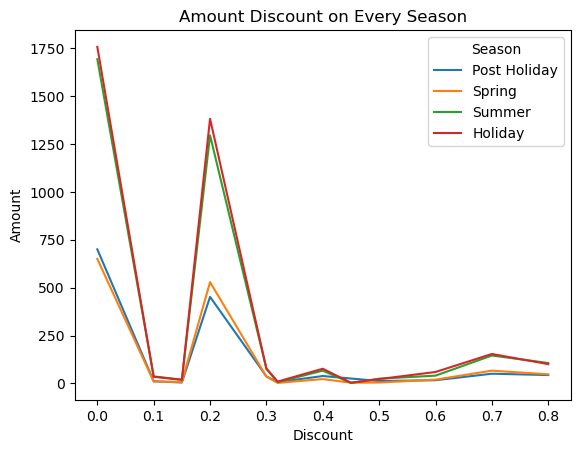

In [21]:
# Melihat frekuensi diskon berdasarkan season
a = df[['Season', 'Discount']].value_counts().reset_index().rename(columns={0:'Amount'})
sns.lineplot(data=a, x='Discount', y='Amount', hue='Season').set_title('Amount Discount on Every Season')

- disini kami membagi periode waktu menjadi 4 bagian utama, yaitu:  
    **Holiday** : periode Oktober-Desember  
    **Post Holiday** : periode Januari-Maret  
    **Spring** : periode April-May  
    **Summer** : periode Juni-September  
- dari ke 4 periode waktu tersebut dapat disimpulkan frekuensi pemberian diskon paling banyak berada di kisaran 10-30


Text(0.5, 1.0, 'Sum Sales per Season')

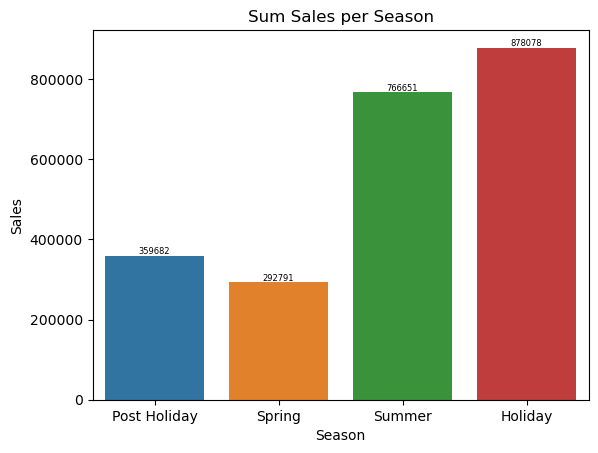

In [419]:
# Menampilkan Total penjualan per season
ax = sns.barplot(data = df.groupby('Season', as_index=False)['Sales'].sum(), x='Season', y='Sales')
for i in ax.containers:
    ax.bar_label(i, fontsize=6)
plt.title('Sum Sales per Season')

Text(0.5, 1.0, 'Sum Profit per Season')

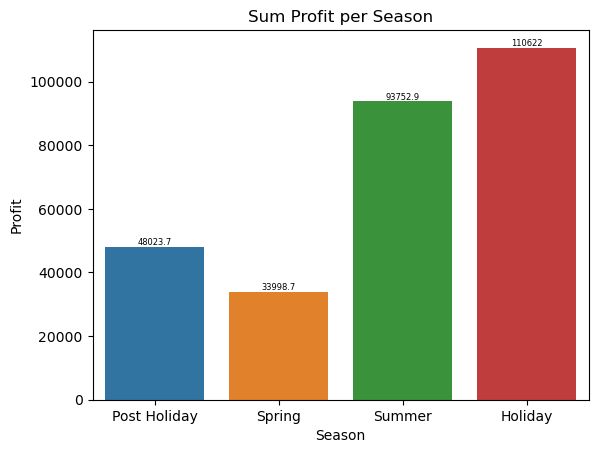

In [23]:
# Menampilkan total profit per season
ax = sns.barplot(data = df.groupby('Season', as_index=False)['Profit'].sum(), x='Season', y='Profit')
for i in ax.containers:
    ax.bar_label(i, fontsize=6)
plt.title('Sum Profit per Season')

**Cari tau barang apa saja yang sering dibeli di tiap season**

In [407]:
df.groupby('Sub-Category', as_index=False)['Sales'].sum()

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


**Holiday**

In [24]:
df[df['Season']=='Holiday']['Sub-Category'].value_counts().reset_index().rename(columns={'index': 'Sub-Category', 'Sub-Category': 'Amount'}).head()
# top 5 barang yang dibeli: Binders, Paper, Furnishing, Phones, Storage

,Sub-Category,Amount
0,Binders,550
1,Paper,493
2,Furnishings,374
3,Phones,324
4,Storage,318


In [25]:
df[df['Season']=='Holiday']['Sub-Category'].value_counts().reset_index().rename(columns={'index': 'Sub-Category', 'Sub-Category': 'Amount'}).tail()


,Sub-Category,Amount
12,Fasteners,84
13,Bookcases,82
14,Supplies,65
15,Machines,42
16,Copiers,25


In [26]:
df[df['Season']=='Holiday']['Sub-Category'].value_counts().reset_index().rename(columns={'index': 'Sub-Category', 'Sub-Category': 'Amount'}).tail()


,Sub-Category,Amount
12,Fasteners,84
13,Bookcases,82
14,Supplies,65
15,Machines,42
16,Copiers,25


In [27]:
df[df['Season']=='Holiday'].groupby('Sub-Category')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head()

,Sub-Category,Sales
5,Chairs,129359.512
13,Phones,121509.782
16,Tables,92598.670
14,Storage,84905.986
6,Copiers,70969.290


In [28]:
df[df['Season']=='Holiday'].groupby('Sub-Category')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head()

,Sub-Category,Profit
6,Copiers,29139.7389
13,Phones,17439.6388
0,Accessories,16571.3922
12,Paper,12557.5796
5,Chairs,10920.5619


In [29]:
df[df['Season']=='Holiday'].groupby('Sub-Category')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).tail()

,Sub-Category,Profit
8,Fasteners,430.3728
15,Supplies,-60.1676
4,Bookcases,-1018.3883
11,Machines,-4211.9780
16,Tables,-7469.7930


In [408]:
df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).tail()

,Sub-Category,Profit
11,Machines,3384.7569
8,Fasteners,949.5182
15,Supplies,-1189.0995
4,Bookcases,-3472.5560
16,Tables,-17725.4811


Pada season Holiday. Top 5 barang yang dibeli:  
- Binders  
- Papers  
- Furnishing  
- Phones  
- Storage  

Namun dari ke lima barang yang paling sering dibeli hanya 2 yang masuk ke dalam top 5 profit yaitu: Phones dan Paper

In [30]:
df[df['Season']=='Holiday']['Category'].value_counts().reset_index()

,index,Category
0,Office Supplies,2166
1,Furniture,834
2,Technology,698


In [31]:
df[df['Season']=='Holiday'].groupby('Category')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head()

,Category,Profit
2,Technology,58938.7919
1,Office Supplies,44374.7390
0,Furniture,7308.1288


buat pd cut di discount untuk memudahkan analisa

In [321]:
df['disc_categ'] = pd.cut(df['Discount'], [0,0.3,0.5,0.8], labels=['small', 'medium', 'big'])
# df.isna().sum()
df.disc_categ = df.disc_categ.astype('str')
df.disc_categ = df.disc_categ.replace('nan', 'no')
# bikin bin terhadap diskon agar memudahkan analisa

In [322]:
df[df['disc_categ']=='no']['Discount'].unique()

array([0.])

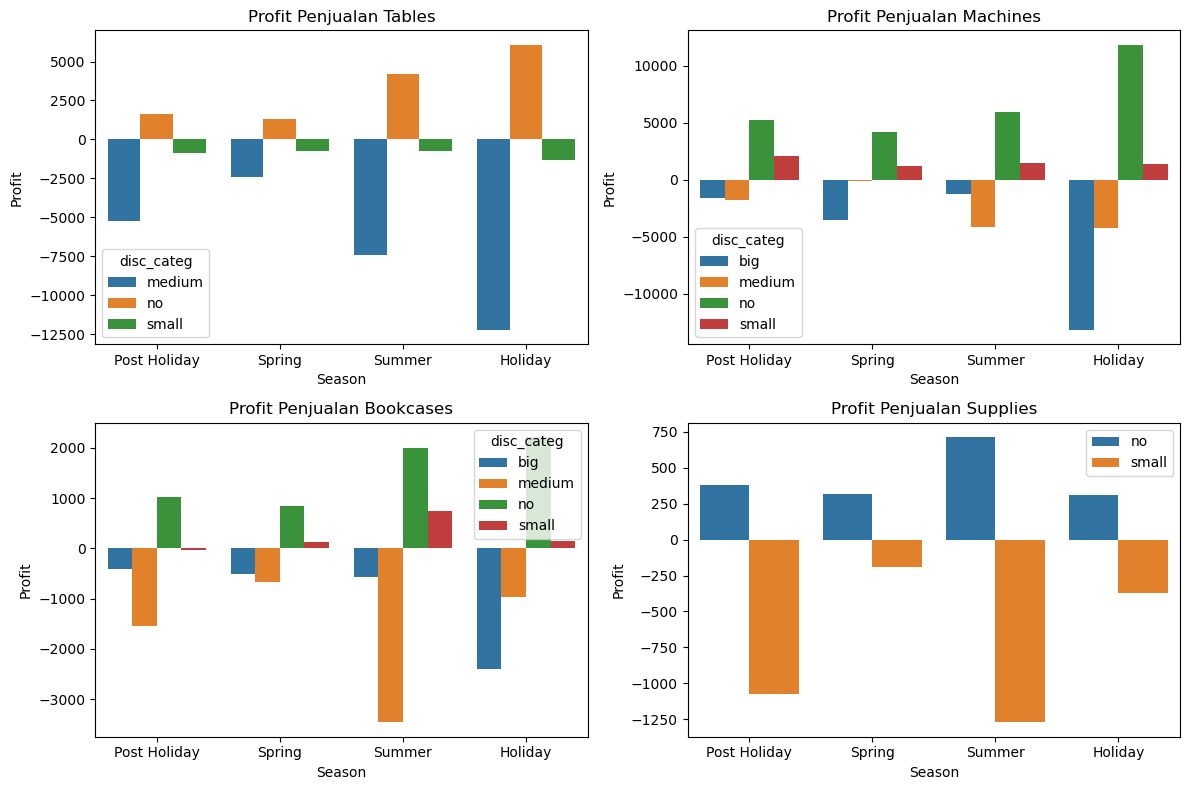

In [323]:
# ax = sns.barplot(data = df[(df['Sub-Category']=='Tables')].groupby(['Season', 'disc_categ'])['Profit'].sum().reset_index(), x='Season', y='Profit', hue='disc_categ')
# plt.legend(loc='lower left')
# plt.title('Profit Penjualan Tables')


figure,axis=plt.subplots(2,2,figsize=(12,8))


# Plot barplots
ax = sns.barplot(data = df[(df['Sub-Category']=='Tables')].groupby(['Season', 'disc_categ'])['Profit'].sum().reset_index(), x='Season', y='Profit', hue='disc_categ', ax=axis[0,0]).set_title('Profit Penjualan Tables')
ax = sns.barplot(data = df[(df['Sub-Category']=='Machines')].groupby(['Season', 'disc_categ'])['Profit'].sum().reset_index(), x='Season', y='Profit', hue='disc_categ', ax=axis[0,1]).set_title('Profit Penjualan Machines')
ax = sns.barplot(data = df[(df['Sub-Category']=='Bookcases')].groupby(['Season', 'disc_categ'])['Profit'].sum().reset_index(), x='Season', y='Profit', hue='disc_categ', ax=axis[1,0]).set_title('Profit Penjualan Bookcases')
ax = sns.barplot(data = df[(df['Sub-Category']=='Supplies')].groupby(['Season', 'disc_categ'])['Profit'].sum().reset_index(), x='Season', y='Profit', hue='disc_categ', ax=axis[1,1]).set_title('Profit Penjualan Supplies')


figure.tight_layout()
plt.legend(loc='best')

plt.show()

- diatas merupakan grafik profit penjualan berdasarkan season pada penjualan terendah.
- penjualan tables disepanjang musim tidak mampu memberikan profit yang signifikan, hal ini dikarenakan telalu banyak dan terlalu sering adanya diskon untuk barang tersebut. begitu jug dengan barang lainnya, terlalu banyak diskon menyebabkan profit yang diterima tidak menutupi loss profit yang diakibatkan oleh diskon tersebut.

In [324]:
df.groupby('disc_categ')['Profit'].sum()

disc_categ
big       -76559.0513
medium    -48447.7273
no        320987.6032
small      90416.1971
Name: Profit, dtype: float64

In [325]:
pd.crosstab(df['Region'], df['disc_categ'], normalize='columns')

disc_categ,big,medium,no,small
Region,,,,
Central,0.511682,0.187097,0.172572,0.247891
East,0.217290,0.629032,0.302001,0.252605
South,0.154206,0.125806,0.167778,0.159801
West,0.116822,0.058065,0.357649,0.339702


In [326]:
pd.crosstab(df['Order Year'], df['disc_categ'], normalize='index')

disc_categ,big,medium,no,small
Order Year,,,,
2014,0.083292,0.033116,0.470146,0.413447
2015,0.088963,0.028069,0.486679,0.396289
2016,0.084654,0.031697,0.482412,0.401237
2017,0.085749,0.031099,0.480072,0.403080


In [327]:
pd.crosstab(df['Season'], df['disc_categ'], normalize='index')

disc_categ,big,medium,no,small
Season,,,,
Post Holiday,0.081336,0.042847,0.508351,0.367466
Spring,0.096222,0.024947,0.463293,0.415538
Summer,0.083618,0.029010,0.481229,0.406143
Holiday,0.085181,0.030827,0.474851,0.409140


In [328]:
# Average Transaction Value per year
sales_year = df.groupby('Order Year', as_index=False)[['Sales']].sum()
sales_year['average_transaction_value'] = sales_year['Sales']/df['Order ID'].nunique()
sales_year

,Order Year,Sales,average_transaction_value
0,2014,484247.4981,96.675484
1,2015,470532.5090,93.937414
2,2016,609205.5980,121.622200
3,2017,733215.2552,146.379568


Text(0.5, 1.0, 'Average Transaction Value 2014-2017 Region')

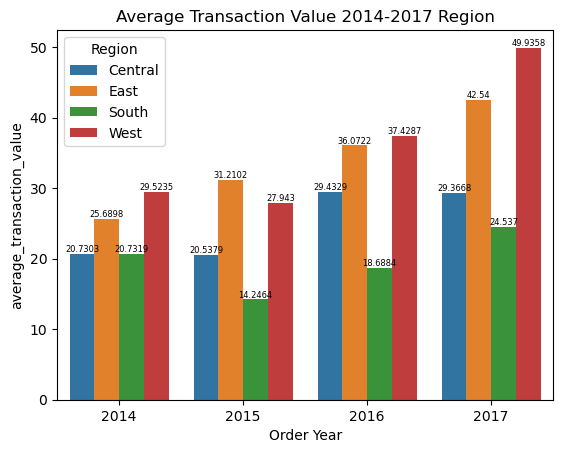

In [329]:
region_year = df.groupby(['Order Year', 'Region'], as_index=False)[['Sales']].sum()
region_year['average_transaction_value'] = region_year['Sales']/df['Order ID'].nunique()
ax = sns.barplot(data=region_year, x='Order Year', y='average_transaction_value', hue='Region')
for i in ax.containers:
    ax.bar_label(i, fontsize=6)
plt.title('Average Transaction Value 2014-2017 Region')

In [330]:
# Average Transaction Value per Season
sales_season = df.groupby('Season', as_index=False)[['Sales']].sum()
sales_season['average_transaction_value'] = sales_season['Sales']/df['Order ID'].nunique()
sales_season

,Season,Sales,average_transaction_value
0,Post Holiday,359681.5758,71.807062
1,Spring,292790.9403,58.452973
2,Summer,766650.7850,153.054659
3,Holiday,878077.5592,175.299972


Text(0.5, 1.0, 'Average Transaction Value Region per Season')

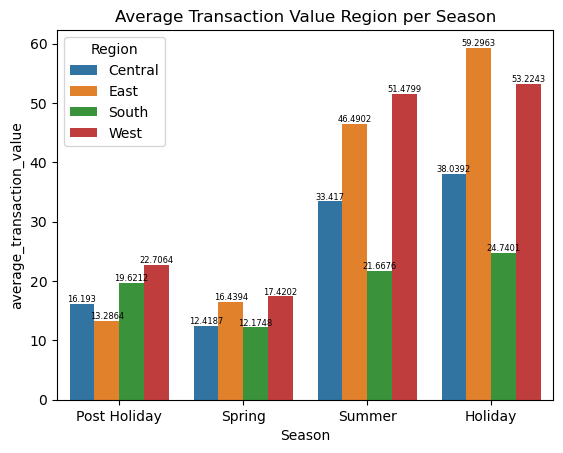

In [331]:
region_season = df.groupby(['Season', 'Region'], as_index=False)[['Sales']].sum()
region_season['average_transaction_value'] = region_season['Sales']/df['Order ID'].nunique()
ax = sns.barplot(data=region_season, x='Season', y='average_transaction_value', hue='Region')
for i in ax.containers:
    ax.bar_label(i, fontsize=6)
plt.title('Average Transaction Value Region per Season')

Rekomendasi, pada season holiday perlu ditingkatkan sales, dengan bisa membuat beberapa strategi pendongkrak seperti menambah diskon/promo namun dengan kategori diskon yang tidak besar agar tetap mendongkrak penjualan.

Text(0.5, 1.0, 'Number Customer')

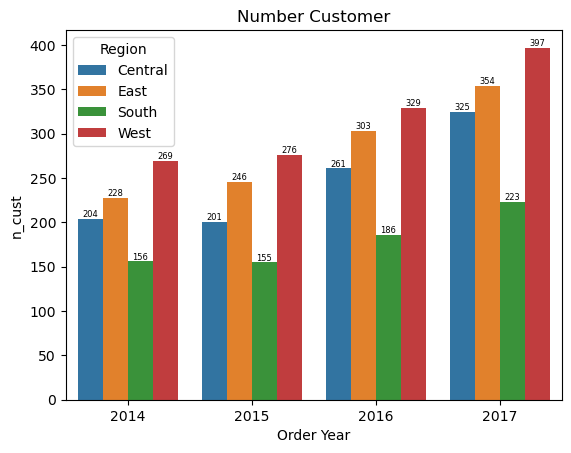

In [332]:
n_cust = df.groupby(['Order Year', 'Region'], as_index=False)['Customer ID'].nunique().rename(columns={'Customer ID': 'n_cust'})
ax = sns.barplot(data=n_cust, x='Order Year', y='n_cust', hue='Region')
for i in ax.containers:
    ax.bar_label(i, fontsize=6)
plt.title('Number Customer')

In [333]:
df.groupby('Region')['Customer ID'].nunique().reset_index().rename(columns={'Customer ID': 'Number of Customer'})

,Region,Number of Customer
0,Central,629
1,East,674
2,South,512
3,West,686


In [334]:
pd.crosstab(df['Region'], df['Segment'])

Segment,Consumer,Corporate,Home Office
Region,,,
Central,1212,673,438
East,1469,877,502
South,838,510,272
West,1672,960,571


<AxesSubplot:xlabel='Region'>

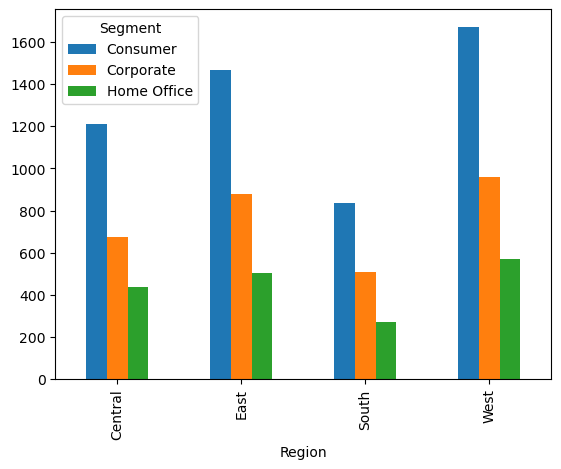

In [335]:
pd.crosstab(df['Region'], df['Segment']).plot(kind='bar')

In [336]:
df[df['Region']=='South']['State'].unique()

array(['Kentucky', 'Florida', 'North Carolina', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Louisiana', 'Georgia', 'Mississippi',
       'Arkansas'], dtype=object)

- fokus di seasonal barang, beberapa barang yang tidak diperuntukkan jangan diberi diskon terlalu besar
- tingkatkan konsumer dengan memperluas advertise
- berikan promo-promo di daerah yang tingkat average transaction nya rendah
- diskon memang cenderung membuat profit menjadi lebih kecil, namun dengan adanya dikon dapat meingkatkan pelanggan  


note:  
- retention customer

In [337]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Profit Margin,Season,disc_categ
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,16.00,Holiday,no
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,30.00,Holiday,no
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,47.00,Summer,no
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,-40.00,Holiday,medium
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11.25,Holiday,small


In [338]:
raw = df[['Order ID', 'Customer ID', 'Segment', 'State', 'Region','Category','Sub-Category' , 'Sales', 'Quantity', 'Discount', 'disc_categ', 'Profit', 'Profit Margin', 'Season']].copy()
raw.head()

,Order ID,Customer ID,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,disc_categ,Profit,Profit Margin,Season
0,CA-2016-152156,CG-12520,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,no,41.9136,16.00,Holiday
1,CA-2016-152156,CG-12520,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,no,219.5820,30.00,Holiday
2,CA-2016-138688,DV-13045,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,no,6.8714,47.00,Summer
3,US-2015-108966,SO-20335,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,medium,-383.0310,-40.00,Holiday
4,US-2015-108966,SO-20335,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,small,2.5164,11.25,Holiday


In [339]:
raw.groupby(['Region', 'Season']).sum()

Sales  Quantity  Discount      Profit  \
Region  Season                                                      
Central Post Holiday   81110.8018      1282     84.24   3565.6732   
        Spring         62205.0988      1203     87.66   3601.7100   
        Summer        167385.5510      3023    188.84   6248.9095   
        Holiday       190538.4392      3272    197.60  26290.0698   
East    Post Holiday   66551.7330      1288     54.30   6716.7744   
        Spring         82344.7550      1439     60.50  12376.5116   
        Summer        232869.6140      3923    156.30  27990.9677   
        Holiday       297015.1380      3968    142.90  44438.5263   
South   Post Holiday   98282.5280      1001     34.20  14464.9529   
        Spring         60983.3270      1035     37.80   9799.2128   
        Summer        108532.8220      2065     74.95  16590.6712   
        Holiday       123923.2280      2108     91.60   5894.5934   
West    Post Holiday  113736.5130      1535     36.15  23276.3435   
        Spring         87257.7595      1561     44.60   8221.3097   
        Summer        257862.7980      4220    123.70  42922.3255   
        Holiday       266600.7540      4950    145.75  33998.4702   

                      Profit Margin  
Region  Season                       
Central Post Holiday   -3369.410364  
        Spring         -5520.251867  
        Summer         -8354.055789  
        Holiday        -6932.425770  
East    Post Holiday    5648.670635  
        Spring          6599.277778  
        Summer         17516.710317  
        Holiday        17861.579365  
South   Post Holiday    4444.583333  
        Spring          4485.106061  
        Summer         10412.272727  
        Holiday         7148.121212  
West    Post Holiday    9756.838235  
        Spring          8654.936275  
        Summer         25852.058824  
        Holiday        26037.730392

In [340]:
raw[raw['Season']=='Holiday'].groupby('Sub-Category', as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)

,Sub-Category,Quantity
3,Binders,2222
12,Paper,1887
9,Furnishings,1415
13,Phones,1218
14,Storage,1193
0,Accessories,1184
2,Art,1043
5,Chairs,982
1,Appliances,641
16,Tables,535


In [341]:
raw[raw['Season']=='Post Holiday'].groupby('Sub-Category',as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)

,Sub-Category,Quantity
3,Binders,798
12,Paper,697
13,Phones,504
9,Furnishings,480
14,Storage,413
2,Art,405
0,Accessories,377
5,Chairs,292
1,Appliances,237
16,Tables,181


In [342]:
raw[raw['Season']=='Spring'].groupby('Sub-Category',as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)

,Sub-Category,Quantity
3,Binders,825
12,Paper,658
9,Furnishings,518
2,Art,512
13,Phones,444
14,Storage,401
0,Accessories,366
5,Chairs,321
1,Appliances,269
10,Labels,205


In [343]:
raw[raw['Season']=='Summer'].groupby('Sub-Category', as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)

,Sub-Category,Quantity
3,Binders,2129
12,Paper,1936
14,Storage,1151
9,Furnishings,1150
13,Phones,1123
0,Accessories,1049
2,Art,1040
5,Chairs,761
1,Appliances,582
10,Labels,562


In [344]:
raw[(raw['Sub-Category']=='Binders')].groupby('disc_categ')['Sales', 'Profit'].sum()

C:\Users\62818\Desktop\projects\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit
disc_categ,,
big,36140.613,-38510.4964
no,81829.480,39314.4507
small,85442.640,29417.8090


In [345]:
raw[(raw['Sub-Category']=='Binders')].groupby('disc_categ')['Quantity'].sum()

disc_categ
big      2456
no       1291
small    2227
Name: Quantity, dtype: int64

In [346]:
df[(df['Sub-Category']=='Binders') & (df['Order Year']==2014)].groupby('disc_categ')['Quantity'].sum()

disc_categ
big      461
no       246
small    382
Name: Quantity, dtype: int64

In [347]:
df[(df['Sub-Category']=='Binders') & (df['Order Year']==2015)].groupby('disc_categ')['Quantity'].sum()

disc_categ
big      511
no       313
small    391
Name: Quantity, dtype: int64

In [348]:
df[(df['Sub-Category']=='Binders') & (df['Order Year']==2016)].groupby('disc_categ')['Quantity'].sum()

disc_categ
big      627
no       307
small    669
Name: Quantity, dtype: int64

In [349]:
df[(df['Sub-Category']=='Binders') & (df['Order Year']==2017)].groupby('disc_categ')['Quantity'].sum()

disc_categ
big      857
no       425
small    785
Name: Quantity, dtype: int64

In [350]:
raw[raw['disc_categ']=='no'].groupby('Sub-Category', as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)

,Sub-Category,Quantity
12,Paper,3229
9,Furnishings,2163
14,Storage,2044
2,Art,1904
0,Accessories,1835
3,Binders,1291
13,Phones,1102
1,Appliances,1021
10,Labels,945
7,Envelopes,548


In [351]:
raw[raw['disc_categ']=='no'].groupby('Sub-Category', as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False).describe()

,Quantity
count,17.000000
mean,1074.529412
std,888.672403
min,82.000000
25%,400.000000
50%,945.000000
75%,1835.000000
max,3229.000000


In [352]:
df.groupby('Ship Mode', as_index=False)['Sub-Category'].count().sort_values('Sub-Category', ascending=False)

,Ship Mode,Sub-Category
3,Standard Class,5968
2,Second Class,1945
0,First Class,1538
1,Same Day,543


**Cari Kategori yang Sering memberikan Diskon**

In [353]:
pd.crosstab(df['Category'], df['disc_categ'], normalize='index').sort_values('no', ascending=False)

disc_categ,big,medium,no,small
Category,,,,
Office Supplies,0.112844,0.000000,0.519250,0.367906
Technology,0.012453,0.077423,0.451002,0.459123
Furniture,0.072136,0.078736,0.394154,0.454974


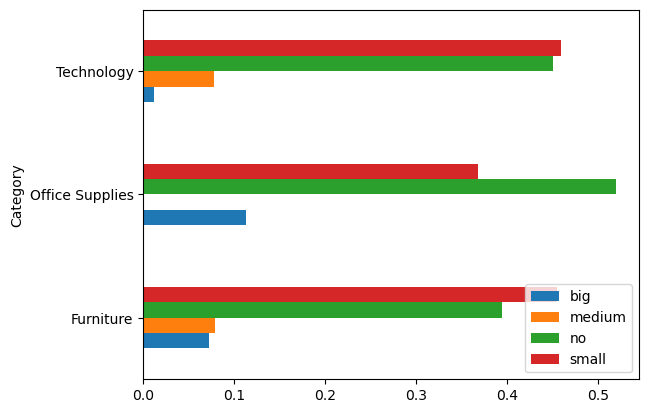

In [354]:
pd.crosstab(df['Category'], df['disc_categ'], normalize='index').plot(kind='barh')
plt.legend(loc='best');

- Jika dilihat grafik diatas presentase dari ketiga kategori secara keseluruhan dalam memberikan diskon yang besar sangatlah kecil.
- kategori office supplies merupakan kategori yang memberikan penjualan tanpa diskon yang paling tinggi.
- dari ketiga kategori yang paling sering memberikan diskon adalah kategori furniture>Technology>Office Supplies

**Category Office Supplies**

In [355]:
pd.crosstab(raw[raw['Category']=='Office Supplies']['Sub-Category'], raw[raw['Category']=='Office Supplies']['disc_categ'], normalize='index').sort_values('no', ascending=False)

disc_categ,big,no,small
Sub-Category,,,
Labels,0.000000,0.656593,0.343407
Storage,0.000000,0.626478,0.373522
Art,0.000000,0.625628,0.374372
Paper,0.000000,0.625547,0.374453
Supplies,0.000000,0.615789,0.384211
Envelopes,0.000000,0.598425,0.401575
Fasteners,0.000000,0.589862,0.410138
Appliances,0.143777,0.581545,0.274678
Binders,0.402495,0.221274,0.376231


<AxesSubplot:ylabel='Sub-Category'>

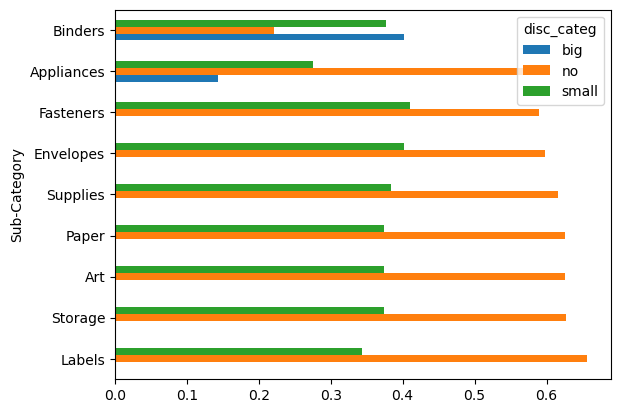

In [356]:
pd.crosstab(raw[raw['Category']=='Office Supplies']['Sub-Category'], raw[raw['Category']=='Office Supplies']['disc_categ'], normalize='index').sort_values('no', ascending=False).plot(kind='barh')

In [357]:
raw[raw['Category']=='Office Supplies'].groupby('Sub-Category', as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)

,Sub-Category,Quantity
2,Binders,5974
6,Paper,5178
7,Storage,3158
1,Art,3000
0,Appliances,1729
5,Labels,1400
4,Fasteners,914
3,Envelopes,906
8,Supplies,647


<AxesSubplot:xlabel='Profit Margin', ylabel='Sub-Category'>

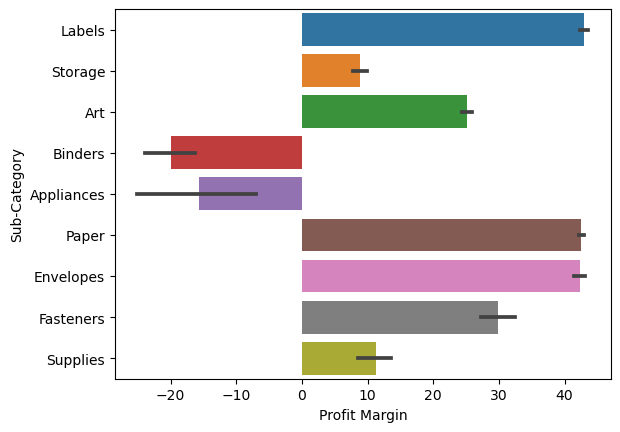

In [358]:
sns.barplot(data=raw[raw['Category']=='Office Supplies'], x='Profit Margin', y='Sub-Category')

- Disini terlihat sub-category pada category office supplies, sebagian besar yang semua barang terjual walau tidak ada diskon, kecuali di sub-category binders dimana banyak melakukan diskon besar besaran.
- memberikan diskon besar dengan frekuensi yang sering juga mengakibatkan terjadi nya loss profit kepada perusahaan.
- rekomendasi, coba menurunkan besaran diskon yang diberikan ke tingkat medium dibandingkan tingkat big, karena akan berdampak kepada profit perusahaan lebih.

**Category Furniture**

In [359]:
pd.crosstab(raw[raw['Category']=='Furniture']['Sub-Category'], raw[raw['Category']=='Furniture']['disc_categ'], normalize='index').sort_values('no', ascending=False)

disc_categ,big,medium,no,small
Sub-Category,,,,
Furnishings,0.144201,0.000000,0.596656,0.259143
Bookcases,0.065789,0.197368,0.263158,0.473684
Tables,0.000000,0.382445,0.225705,0.391850
Chairs,0.000000,0.000000,0.215559,0.784441


<AxesSubplot:ylabel='Sub-Category'>

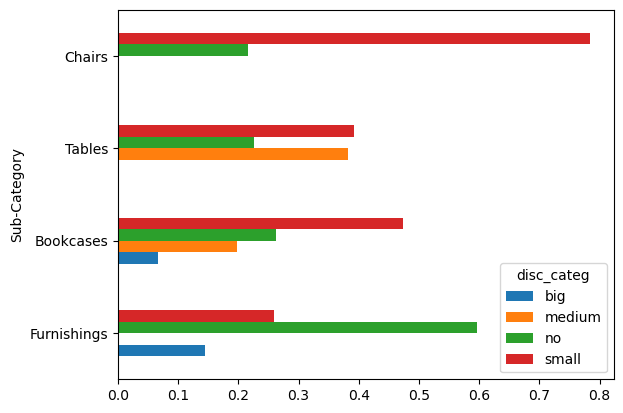

In [360]:
pd.crosstab(raw[raw['Category']=='Furniture']['Sub-Category'], raw[raw['Category']=='Furniture']['disc_categ'], normalize='index').sort_values('no', ascending=False).plot(kind='barh')

In [ ]:
pd.crosstab(raw[(raw['Category']=='Furniture')&(raw['Order Year']==2014)]['Sub-Category'], raw[raw['Category']=='Furniture']['disc_categ'], normalize='index').sort_values('no', ascending=False).plot(kind='barh')

Kategori Furniture perlu dipertimbangkan lagi karena seluruh penjualan di kategori tersebut berasal dari promo/diskon saja.

<AxesSubplot:xlabel='Profit Margin', ylabel='Sub-Category'>

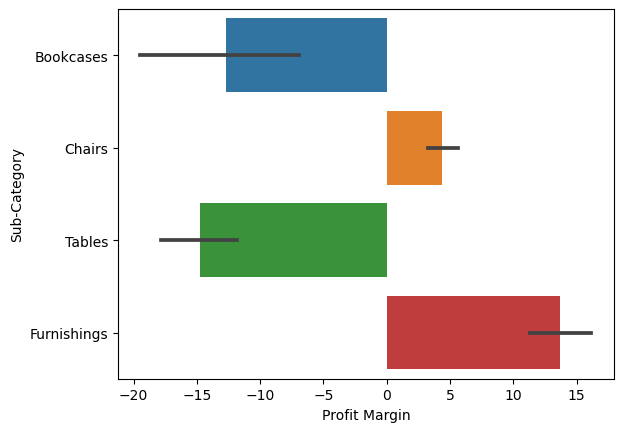

In [361]:
sns.barplot(data=raw[raw['Category']=='Furniture'], x='Profit Margin', y='Sub-Category')

In [362]:
raw[raw['Category']=='Furniture'].groupby('Sub-Category', as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)

,Sub-Category,Quantity
2,Furnishings,3563
1,Chairs,2356
3,Tables,1241
0,Bookcases,868


In [363]:
raw.groupby('Category',as_index=False)['Quantity'].sum()

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


- Secara keseluruhan Furniture cukup laku, namun perlu dipertimbangkan lagi karena jika diperhatikan kategori ini memerlukan promo untuk mendapatkan sales atau penjualan, sehingga perlu dikembangkan strategi lain untuk mendongkrak profit dari kategori ini.

**Perbandingan Dengan diskon dan tanpa diskon**


In [364]:
# tanpa diskon berdasarkan kategori
no_disc = raw[raw['disc_categ']=='no'].groupby('Category', as_index=False)[['Quantity', 'Profit']].sum().sort_values('Quantity', ascending=False)
no_disc

,Category,Quantity,Profit
1,Office Supplies,11886,130506.1064
0,Furniture,3224,58133.0764
2,Technology,3157,132348.4204


In [365]:
small_disc = raw[raw['disc_categ']=='small'].groupby('Category', as_index=False)[['Quantity', 'Profit']].sum().sort_values('Quantity', ascending=False)
small_disc

,Category,Quantity,Profit
1,Office Supplies,8329,39124.8320
0,Furniture,3584,4100.6356
2,Technology,3167,47190.7295


In [366]:
medium_disc = raw[raw['disc_categ']=='medium'].groupby('Category', as_index=False)[['Quantity', 'Profit']].sum().sort_values('Quantity', ascending=False)
medium_disc

,Category,Quantity,Profit
0,Furniture,651,-33942.8446
1,Technology,526,-14504.8827


In [367]:
big_disc = raw[raw['disc_categ']=='big'].groupby('Category', as_index=False)[['Quantity', 'Profit']].sum().sort_values('Quantity', ascending=False)
big_disc

,Category,Quantity,Profit
1,Office Supplies,2691,-47140.1376
0,Furniture,569,-9839.5946
2,Technology,89,-19579.3191


Disini terlihat bahwa barang yang terjual dengan adanya promo lebih sedikit dibandingkan, barang tanpa promo sama sekali. Sehingga dapat diasumsikan hampir seluruh kategori di retail merupakan barang yang dibutuhkan oleh customer tanpa mementingkan promo sama sekali

<AxesSubplot:xlabel='Season'>

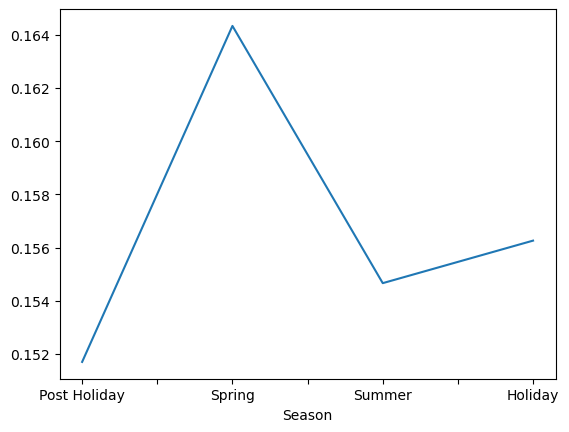

In [368]:
# sns.lineplot(data=df, x='Discount', y='' hue='Season')

raw.groupby('Season')['Discount'].mean().plot(kind='line')

<AxesSubplot:xlabel='disc_categ', ylabel='Sales'>

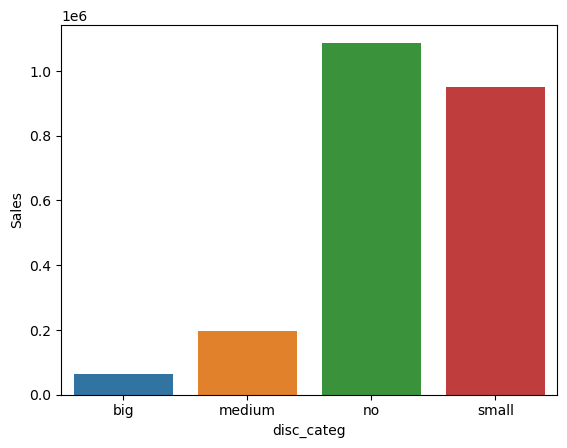

In [436]:
sns.barplot(data = raw.groupby('disc_categ', as_index=False).sum(), x='disc_categ', y='Sales')

**Cek Pengaruh Return terhadap Sales/Profit**

In [369]:
retur = raw.groupby(['Order ID', 'Region', 'State'])[['Sales','Profit']].sum().reset_index()
retur = retur.merge(returns, how='left')
retur.Returned = retur.Returned.fillna('No')

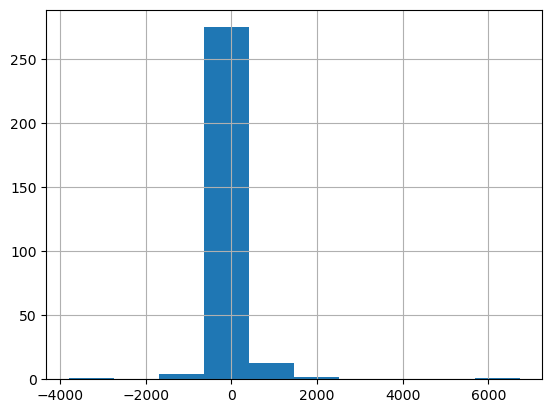

In [370]:
retur[retur['Returned']=='Yes']['Profit'].hist();

In [371]:
retur.groupby('Returned')[['Sales', 'Profit']].median()

,Sales,Profit
Returned,,
No,146.040,15.5520
Yes,261.755,31.3147


In [372]:
pd.crosstab(retur['Region'], retur['Returned'])

Returned,No,Yes
Region,,
Central,1136,39
East,1357,44
South,798,24
West,1422,189


Dari sini terlihat bahwa features Returned tidak mempengaruhi sales dan profit dari penjualan retail barang. sehingga tidak perlu dilakukan analisis mendalam lagi.

**Cek Region yang menghasilkan Loss Profit**

In [373]:
loss = raw[raw['Profit']<0]
loss.head()

,Order ID,Customer ID,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,disc_categ,Profit,Profit Margin,Season
3,US-2015-108966,SO-20335,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,medium,-383.0310,-40.000000,Holiday
14,US-2015-118983,HP-14815,Home Office,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,big,-123.8580,-180.000000,Holiday
15,US-2015-118983,HP-14815,Home Office,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,big,-3.8160,-150.000000,Holiday
23,US-2017-156909,SF-20065,Consumer,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,small,-1.0196,-1.428571,Summer
27,US-2015-150630,TB-21520,Consumer,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,medium,-1665.0522,-54.000000,Summer


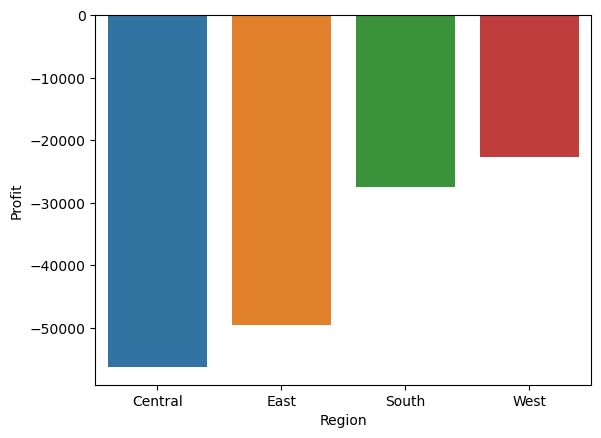

In [374]:
sns.barplot(data=loss.groupby('Region', as_index=False).sum(), x='Region', y='Profit');

<AxesSubplot:xlabel='Region'>

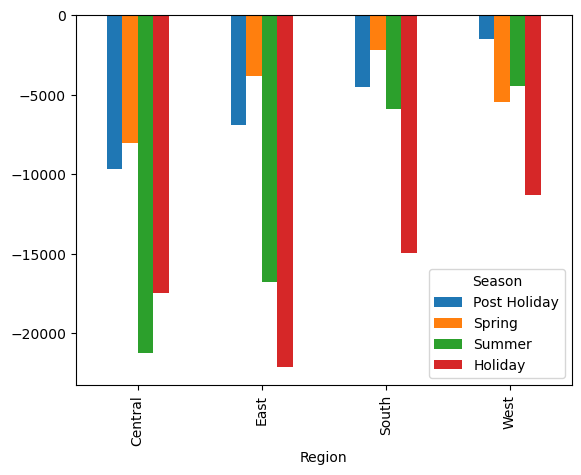

In [375]:
loss.pivot_table(values='Profit', index='Region', columns='Season', aggfunc='sum').plot(kind='bar')

In [376]:
pd.crosstab(loss[loss['Region']=='Central']['Season'], loss[loss['Region']=='Central']['disc_categ'])

disc_categ,big,medium,small
Season,,,
Post Holiday,61,11,39
Spring,68,5,45
Summer,148,20,81
Holiday,161,17,85


In [377]:
pd.crosstab(loss[loss['Region']=='East']['Season'], loss[loss['Region']=='East']['disc_categ'])

disc_categ,big,medium,small
Season,,,
Post Holiday,21,40,20
Spring,30,20,27
Summer,78,57,63
Holiday,57,57,83


In [378]:
pd.crosstab(loss[loss['Region']=='South']['Season'], loss[loss['Region']=='South']['disc_categ'])

disc_categ,big,medium,small
Season,,,
Post Holiday,23,5,10
Spring,22,5,17
Summer,37,10,26
Holiday,50,19,35


In [379]:
pd.crosstab(loss[loss['Region']=='West']['Season'], loss[loss['Region']=='West']['disc_categ'])

disc_categ,big,medium,small
Season,,,
Post Holiday,7,1,23
Spring,15,1,22
Summer,31,6,65
Holiday,47,10,90


In [380]:
pd.crosstab(loss['Region'], loss['disc_categ'])

disc_categ,big,medium,small
Region,,,
Central,438,53,250
East,186,174,193
South,132,39,88
West,100,18,200


Disinilah terlihat bahwa apa yang menyebabkan central mengalami loss profit yang cukup signifikan, karena central terlalu banyak memberikan diskon dengan kategori yang besar. dan sebagian besar dilakukan pada saat liburan musim panas (Summer) dan Holiday.

In [382]:
pd.crosstab(df[df['Region']=='Central']['Order Year'],df[df['Region']=='Central']['disc_categ'], normalize='columns' )

disc_categ,big,medium,no,small
Order Year,,,,
2014,0.221461,0.241379,0.170290,0.214214
2015,0.207763,0.189655,0.207729,0.202202
2016,0.237443,0.189655,0.276570,0.259259
2017,0.333333,0.379310,0.345411,0.324324


In [383]:
pd.crosstab(df[df['Region']=='East']['Order Year'],df[df['Region']=='East']['disc_categ'], normalize='columns' )

disc_categ,big,medium,no,small
Order Year,,,,
2014,0.193548,0.210256,0.167702,0.193517
2015,0.215054,0.205128,0.241546,0.210216
2016,0.241935,0.266667,0.268461,0.275049
2017,0.349462,0.317949,0.322291,0.321218


In [384]:
pd.crosstab(df[df['Region']=='South']['Order Year'],df[df['Region']=='South']['disc_categ'], normalize='columns' )

disc_categ,big,medium,no,small
Order Year,,,,
2014,0.151515,0.179487,0.245963,0.192547
2015,0.265152,0.128205,0.207453,0.206522
2016,0.303030,0.307692,0.265839,0.228261
2017,0.280303,0.384615,0.280745,0.372671


In [385]:
pd.crosstab(df[df['Region']=='West']['Order Year'],df[df['Region']=='West']['disc_categ'], normalize='columns' )

disc_categ,big,medium,no,small
Order Year,,,,
2014,0.13,0.222222,0.206876,0.211103
2015,0.21,0.166667,0.194639,0.207451
2016,0.30,0.388889,0.242424,0.257122
2017,0.36,0.222222,0.356061,0.324324


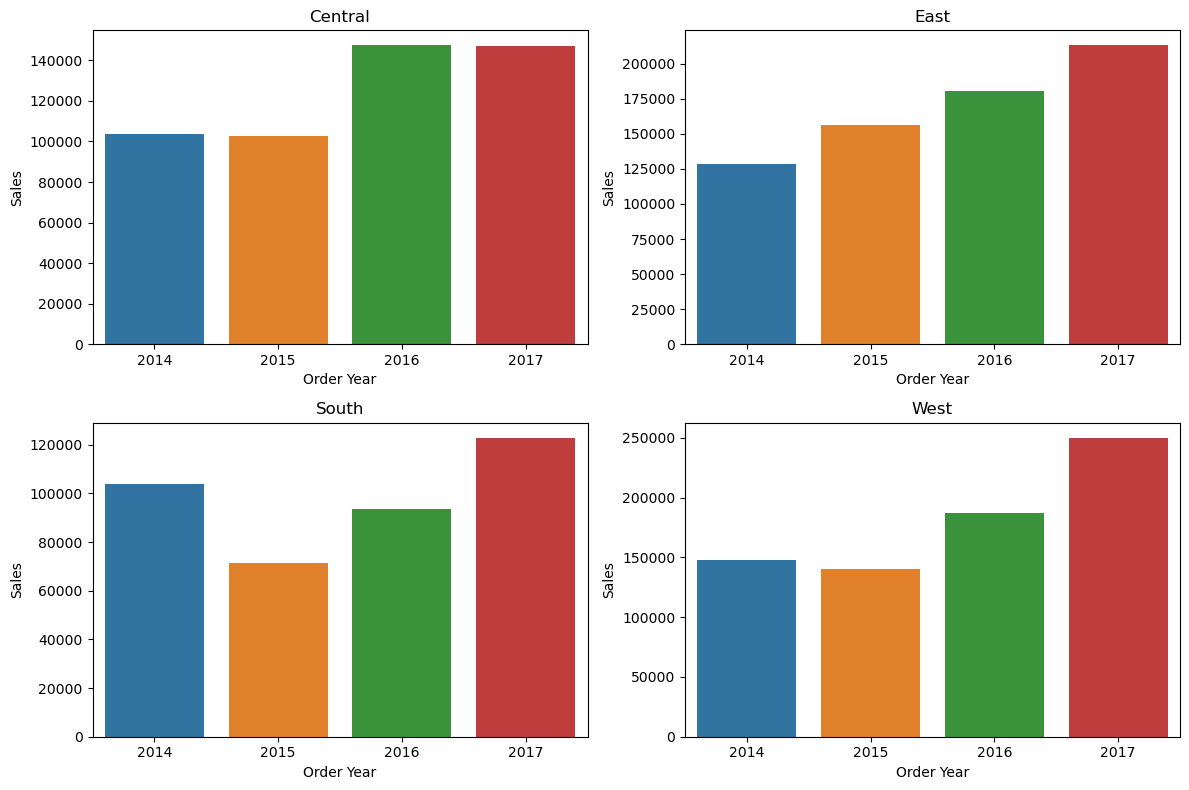

In [386]:
figure,axis=plt.subplots(2,2,figsize=(12,8))

sales_central = df[(df['Region']=='Central')].groupby('Order Year', as_index=False).sum()
sales_east = df[(df['Region']=='East')].groupby('Order Year', as_index=False).sum()
sales_south = df[(df['Region']=='South')].groupby('Order Year', as_index=False).sum()
sales_west = df[(df['Region']=='West')].groupby('Order Year', as_index=False).sum()



# Plot barplots
sns.barplot(data=sales_central, x='Order Year', y='Sales', ax=axis[0,0]).set(title='Central')
sns.barplot(data=sales_east, x='Order Year', y='Sales', ax=axis[0,1]).set(title='East')
sns.barplot(data=sales_south, x='Order Year', y='Sales', ax=axis[1,0]).set(title='South')
sns.barplot(data=sales_west, x='Order Year', y='Sales', ax=axis[1,1]).set(title='West')

figure.tight_layout()



plt.show()

Summary:
- Average Transaction Value -> menentukan tingkat transaksi, semakin tinggi tingkat transaksi akan meningkatkan sales dan profit dari retail
- Menurunkan besaran diskon, agar retail menghasilkan profit yang lebih terhadap barang primary (barang yang dibutuhkan konsumen). karena beberapa barang merupakan barang primary yang dibutuhkan tanpa ada nya promo/diskon barang tersebut tetap laku di beli.
- Beri batasan dalam pemberian diskon serta pada barang primary dapat dikurangi frekuensi pemberian diskon-nya.
- Kategori Furniture perlu dipertimbangkan lagi karena seluruh penjualan di kategori tersebut berasal dari promo/diskon saja.
